In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os

In [2]:
paths_to_add = ['/Users/lisa1010/dev/Melydi/melydi']

In [3]:
for p in paths_to_add:
    if p not in sys.path:
        sys.path.append(p)

In [4]:
from signal_processing.pitch_processing import *

In [5]:
data_folder = '/Users/lisa1010/dev/Melydi/melydi/data_old/piano_notes/one_octave/'

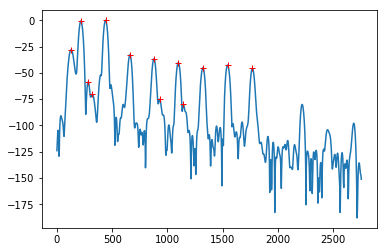

143.9701615131684


In [6]:
fname = 'A2.wav'
fpath = os.path.join(data_folder, fname)
fs, x = read(fpath)
x = np.array(x, np.float)
x /= max(abs(     x))
ton = get_onset(fs, x)
x_chunk = x[int(ton*fs):int(ton*fs)+2048]
f0 = get_f0(fs, x_chunk)
# f0 = get_f0(fs, x)
print (f0)

In [7]:
ton

0.8300000000000001

In [8]:
fs

44100

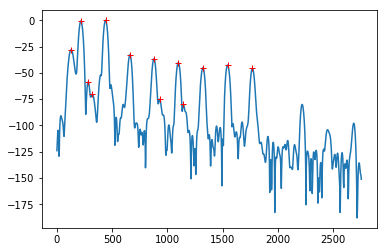

In [10]:
f_peaks, dBs = get_peaks(fs, x_chunk)

In [11]:
f_peaks


array([ 128.70509761,  217.15977464,  283.20428767,  320.71681137,
        440.42004458,  661.21268829,  878.76713198,  931.08488539,
       1099.3219752 , 1145.85670093, 1322.30483011, 1545.45551259,
       1770.32368181])

In [12]:
width = int(2**np.ceil(np.log(len(x_chunk))/np.log(2)))
width = 2048*8
x_windowed = x_chunk*get_window('hamming', len(x_chunk))
freq, mY, pY = spectrum(fs, x_windowed, width)
mY = mY-max(mY)


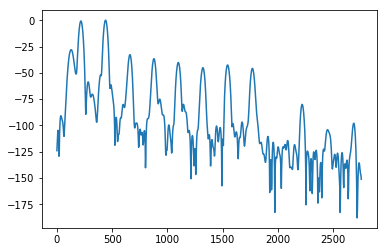

In [13]:
plt.plot(freq, mY)

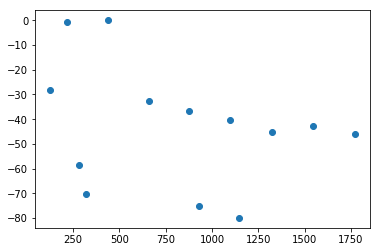

In [31]:
plt.scatter(f_peaks, dBs)

In [17]:
diffs = [f_peaks[i] - f_peaks[i-1] for i in range(1, len(f_peaks))]

In [18]:
diffs

[88.45467702696558,
 66.04451302939486,
 37.51252370338915,
 119.70323321179416,
 220.7926437095303,
 217.55444368620692,
 52.317753410472505,
 168.23708981454263,
 46.53472573134559,
 176.44812917553463,
 223.1506824794883,
 224.8681692190712]

In [19]:
diffs_2 = [f_peaks[i] - f_peaks[i-2] for i in range(2, len(f_peaks))]

In [20]:
diffs_2

[154.49919005636045,
 103.55703673278401,
 157.2157569151833,
 340.49587692132445,
 438.3470873957372,
 269.87219709667943,
 220.55484322501513,
 214.77181554588822,
 222.98285490688022,
 399.5988116550229,
 448.0188516985595]

In [36]:
new_peaks  = []
new_dbs = []
new_peaks.append(f_peaks[0])
new_dbs.append(dBs[0])
for i in range(1, len(dBs) - 1):
    pre = dBs[i-1]
    cur = dBs[i]
    nex = dBs[i+1]
#     print (abs(pre-cur))
#     print (abs(pre-nex))
#     print ()
    if (pre-cur)/abs(pre-nex) > 5 and (nex-cur)/abs(pre-nex) > 5:
        print (pre, cur, nex)
    else:
        new_peaks.append(f_peaks[i])
        new_dbs.append(dBs[i])
new_peaks.append(f_peaks[-1])
new_dbs.append(dBs[-1])

        

-36.56784536103805 -75.05210530527256 -40.202768639115675
-40.202768639115675 -79.93563088866358 -45.16786593368306


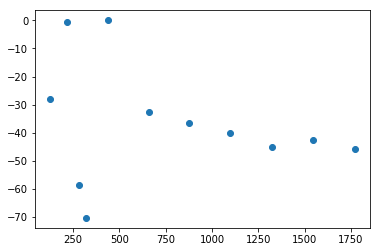

In [37]:
plt.scatter(new_peaks, new_dbs)

In [38]:
diffs = [new_peaks[i] - new_peaks[i-1] for i in range(1, len(new_peaks))]

In [39]:
diffs

[88.45467702696558,
 66.04451302939486,
 37.51252370338915,
 119.70323321179416,
 220.7926437095303,
 217.55444368620692,
 220.55484322501513,
 222.98285490688022,
 223.1506824794883,
 224.8681692190712]

In [ ]:
diffs = 